# Hawaiian Stopwords

This goal of this project is to create a list of stopwords for the Hawaiian language. In NLP (Natural Language Processing), stopwords are the most commonly used words. In English, these are words like "and" and "the" - filtering a text of these words can help reduce noise and improve NLP algorithms' accuracy.

This project will arbitrarily use five different Hawaiian language newspapers to create the list. First, I will tokenize the words from the newspapers. Then, I will count each term's frequency of occurrence and place them in a data frame. Finally, I will graph the data to find cutoff points based on a presumed geometric asymptote convergence location. I will ultimately use the discretion of my language domain knowledge to supersede what makes the cutoff. Here are the assumptions:
1. That five newspapers is a large enough corpus
2. That the language used in these periodicals is still relevant to today (the dates of the newspapers will be varied and range from 1834 through 1902)
3. That the word count graph is negative exponential

## Extraction


Let's use pythons docx library which will allow us to manipulate word document text with python code.

In [46]:
import docx

def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

npTextOne = getText("Ka Elele Hawaii Buke 4 Pepa 1 Aoao 1 Iune 8 1848.docx")

In [47]:
print(npTextOne)

KA ELELE HAWAII.
 
BUKE 4. Honolulu, Oahu, Iune 8, 1848. PEPA 1.
 
Olelo Hoike na ke Kuhina no ke Aopalapala: ua heluheluia imua o ka Ahaolelo i ka la o Aperila 27, 1848.
            Na na Lii Ahaolelo, a me ka Poeikohoia e na makaainana, iloko o ka Ahaolelo.
            E like me ke kauoha a ka Moi, ke waiho nei au imua o oukou i wahi olelo pokole no ka “Oihana Aopalapala.” Mai ka malama o Sepatemaba a hiki i keia wa, ua hooiliia mai ia Oihana maluna o’u, e ka Moi, a me ka Ahakukakuka Malu.
            He mea kaumaha hoi ka mea i hooiliia mai ai keia Oihana maluna o’u. O ke Kuhina hoopono nana keia Oihana, ua loohia oia i ka ma ii kela malama o Iulai, emo ole hoi ko ke AKua kahea ana mai ia ia, a ua laweia’ku oia mai keia ao aku i ka la 7 o Novemaba.
            He kanaka maikai o Wm. Rikeke, he oiaio kona aloha i keia lahuikanaka, a ua hooikaika mau oia e hoomaikai i ko Hawaii nei i na makahiki he 24: eiwa hoi makahiki in oho ai oia iloko o ka hana a ka Moi. He nui wale ka aie o keia

## Preprocessing and Tokenizing

We're going to make a function called cleanText() that removes punctuation and numbers from the text. We will combine this to the getText() function that we created previously and call the split() method to create a list of individual words for each newspaper.

In [48]:
import string

noThanks = string.punctuation
noThanks += "1234567890"

def cleanText(someText):
    someText = someText.replace('\n',' ') # new lines
    temp = ""
    for i in someText:
        if i in noThanks:
            temp += " "
        else:
            temp += i
            
    return temp

In [49]:
npWordListOne = cleanText(getText("Ka Elele Hawaii Buke 4 Pepa 1 Aoao 1 Iune 8 1848.docx")).lower().split()

In [50]:
npWordListOne[:10]

['ka',
 'elele',
 'hawaii',
 'buke',
 'honolulu',
 'oahu',
 'iune',
 'pepa',
 'olelo',
 'hoike']

In [51]:
npWordListTwo = cleanText(getText("Ka Lama Hawaii Makahiki 1 Helu 1 Aoao 1 Feberuari 14 1834.docx")).lower().split()

In [52]:
npWordListThree = cleanText(getText("Ka Makaainana Buke 11 Helu 7 Aoao 1 Feberuari 13 1899.docx")).lower().split()

By the way, this issue of Ke Kiai ended in a section of English so I trimmed this before saving to the .docx

In [53]:
npWordListFour = cleanText(getText("Ke Kiai Buke 1 Helu 3 Aoao 1 Sepatemaba 11 1902.docx")).lower().split()

In [54]:
npWordListFive = cleanText(getText("Nupepa Kuokoa Buke 1 Helu 1 Okakopa 1861.docx")).lower().split()

## Making the dataframe


We're going to combine all five lists of words, count the number of occurances, place in a pandas dataframe and reset the index (and make a dummy index "ind" to use as our graphs' x-axis)

In [55]:
corpusList = npWordListOne + npWordListTwo + npWordListThree + npWordListFour + npWordListFive

Counting the number of occurances in the corpus

In [56]:
corpusDict = {}

for i in corpusList:
    if i in corpusDict:
        corpusDict[i] +=1
    else:
        corpusDict[i] = 1

In [57]:
for i in range(5):
    print(list(corpusDict.keys())[i], ":",corpusDict[list(corpusDict.keys())[i]])

ka : 3187
elele : 21
hawaii : 132
buke : 31
honolulu : 64


Making the dataframe

In [58]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data=[[i, corpusDict[i]] for i in corpusDict ], columns=["word", "freq"])

Ordering by frequency, setting the index, and making the dummy column

In [59]:
df.sort_values(by="freq",ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df["ind"] = np.arange(0,3446)

## Analyzing the data


In [60]:
df.head()

,word,freq,ind
0,ka,3187,0
1,i,2838,1
2,o,2584,2
3,a,2040,3
4,e,1745,4


In [61]:
df.tail()

,word,freq,ind
3441,haia,1,3441
3442,mauleule,1,3442
3443,hamakuapoko,1,3443
3444,tempsky,1,3444
3445,wepa,1,3445


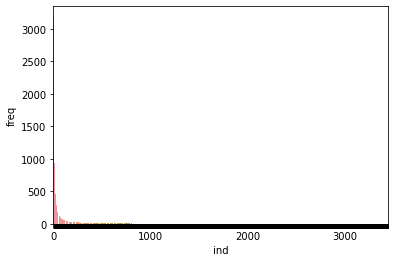

In [62]:
import seaborn as sns

g = sns.barplot(data=df, y="freq", x="ind")

for ind, label in enumerate(g.get_xticklabels()):
    if ind % 1000 == 0:  # x ticks
        label.set_visible(True)
    else:
        label.set_visible(False)


Let's zoom in

[(0, 800)]

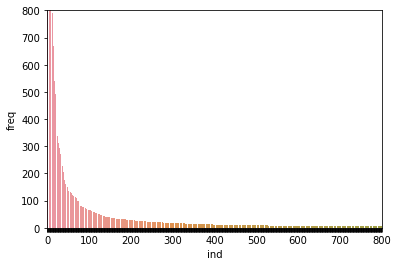

In [63]:
g = sns.barplot(data=df, y="freq", x="ind")

for ind, label in enumerate(g.get_xticklabels()):
    if ind % 100 == 0:  # x ticks
        label.set_visible(True)
    else:
        label.set_visible(False)
g.set(ylim=(0, 800))
g.set(xlim=(0, 800))


Somewhere around x=100 should be used as the cutoff

## Finishing up

Let's see which words would be included in the stopwords list with 100 as the cutoff

In [64]:
df[df["freq"]>100] # 

,word,freq,ind
0,ka,3187,0
1,i,2838,1
2,o,2584,2
3,a,2040,3
4,e,1745,4
...,...,...,...
68,pu,112,68
69,maikai,110,69
70,make,110,70
71,wa,107,71


Looks pretty good but I don't want kula in the list... let's look at which words didn't make the cutoff at x=100

In [65]:
df[df["freq"]<100].head(20) #

,word,freq,ind
73,au,98,73
74,aloha,97,74
75,nae,97,75
76,nana,92,76
77,aohe,90,77
78,maluna,88,78
79,nupepa,81,79
80,kana,81,80
81,kau,81,81
82,wahine,79,82


Ok so using my domain knowledge I'm going to make the cutoff at 79 because I don't want wahine (woman) to be a stopword. I will also now manually remove kula (school) and also nupepa (newspaper). I will add kaua (us) to the list of stopwords.

In [66]:
stopwords = list(df[df["freq"]>79]["word"])

In [67]:
stopwords.remove("kula")

stopwords.remove("nupepa")

stopwords.append("kaua")

The full list of stopwords

In [68]:
stopwords

['ka',
 'i',
 'o',
 'a',
 'e',
 'na',
 'ke',
 'no',
 'ia',
 'ua',
 'ana',
 'me',
 'mai',
 'ma',
 'he',
 'mea',
 'la',
 'aku',
 'ai',
 'hoi',
 'keia',
 'nei',
 'mau',
 'ko',
 'kona',
 'lakou',
 'nui',
 'poe',
 'kekahi',
 'loa',
 'ae',
 'oia',
 'iho',
 'pono',
 'hana',
 'aole',
 'kahi',
 'pau',
 'ole',
 'hiki',
 'ike',
 'kakou',
 'kanaka',
 'hou',
 'olelo',
 'aina',
 'ano',
 'noho',
 'makou',
 'manao',
 'loaa',
 'wale',
 'hele',
 'hale',
 'like',
 'wahi',
 'hawaii',
 'ina',
 'iloko',
 'paha',
 'aupuni',
 'eia',
 'oukou',
 'oe',
 'kela',
 'u',
 'moku',
 'ku',
 'pu',
 'maikai',
 'make',
 'wa',
 'au',
 'aloha',
 'nae',
 'nana',
 'aohe',
 'maluna',
 'kana',
 'kau',
 'kaua']

The length of the list

In [69]:
len(stopwords)

81

## Conclusion


The stopwords of a language are powerful. Knowing them can amplify algorithms like Cosine Similarity and Malik Summarization ( See my Project 3 to see a text summarization technique). That said, I'm pleased with the list of stopwords. The final product validates the approach I used, but it could be even better.  For instance, we could increase the number of newspapers used, using more modern texts, or even trying out TF - IDF (Term Frequency - Inverse Document Frequency) to select words. I am open to feedback about the approach.